- Choose Stakeholder: For whom are you performing this analysis (Every Door Real Estate)
- Business Understanding: at least 2 important parameters estimates as recomendations
- Data Understanding: Whats in this data, how relevant is this data
- Data Prep: Train/Test split, Nulls, Duplicates, Outlires, Log transformation, encoding variables (one-hot-encoding, binning), polynomial features, interation terms, SCALE
- At least one non numaric feature included in a model
- First simple model: what is your model-less baseline
- Interactive Modeling: Iterate by adding complexity( more columns, different interations:
- Each iteration of your model adheres to assumptions of liniear reg
    Linear Relationship, low Multicollinearity(VIF), Normal dis of   Errors(Q-Qplot)(lower the score the more), Homoskedasticity of Errors
- Interpreting models: check if your input variables are statistically significant. R2. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.preprocessing import OrdinalEncoder
from sklearn.dummy import DummyRegressor
import sklearn.metrics as metrics
import statsmodels.api as sm

In [2]:
#importing the dataset as df
df = pd.read_csv('data/kc_house_data.csv') 

LMP notes - we should have a couple cells in here about exploring and reading the data - 


`df.head()`, `df.info()`, `df.isna().sum()`, etc. 

In [31]:
# splitting data 25% for testing and 75% for training
#should we drop price here? we can't see what's strongly correlated to it ... see below
y = df["price"]
X = df.drop("price", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

LMP Notes - should data cleaning of our X_train go here? 

<AxesSubplot:>

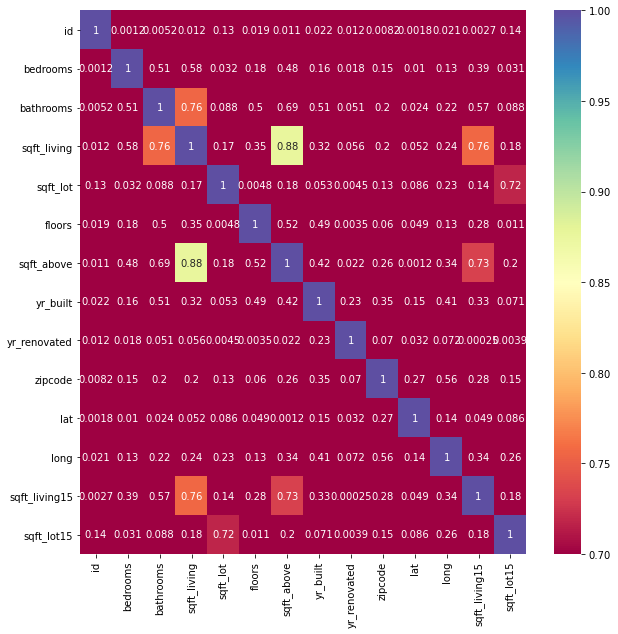

In [24]:
# check multicollinearity
plt.figure(figsize=(10,10))
sns.heatmap(X.corr().abs(), cmap = "Spectral", vmin=0.7,annot = True)

**Observations:**
Collineraity is when one feature variable in a regression model is highly linearly correlated with another feature variable.
there are collinearity between: 
1) [sqft_living] and ['sqft_above','bathrooms','sqft_living15']
2) [sqft_lot] colliniear with [sqft_lot_15]
4) [sqft_above] with [bathrooms]

Based on this we may choose to drop sqft_living15, sqft_above and sqft_lot15

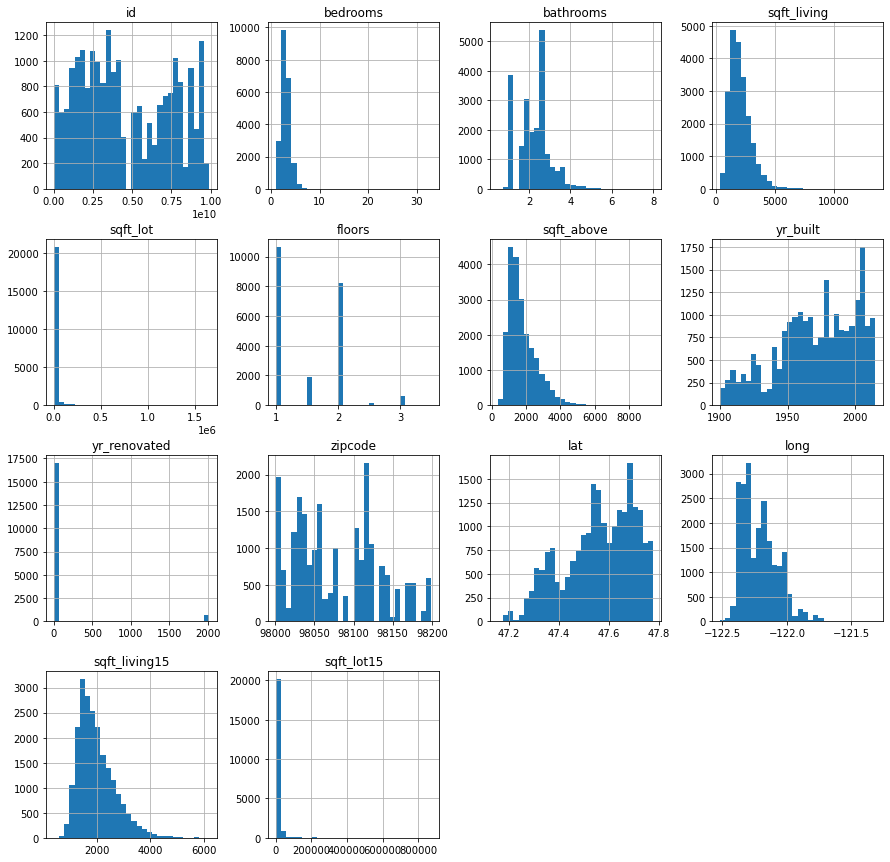

In [25]:
# Plot all features
X.hist(figsize  = [15, 15],bins=30) 
plt.show()

## Models 

In [5]:
#setting up a dummy regressor - this sets up a baseline to use to compare linear regression models we build going forward
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
dummy_regr.predict(X_train)
dummy_regr.score(X_train, y_train)

0.0

In [11]:
ss = StandardScaler()
#X_train.drop(columns=['date', 'yr_renovated', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement'], inplace=True)
#the .drop() above didn't work -- why are we dropping these columns? 
ss.fit(X_train)
xtrain_scaled = ss.transform(X_train)

In [12]:
#this is our first model ? 
lr = LinearRegression()
lr.fit(xtrain_scaled, y_train)
lr.coef_

array([ -4008.33162704, -55135.76142593,  48647.41221956, 208069.86658042,
         6521.97869438,  17317.08997737,  17781.96866658, -78650.0771591 ,
       -29463.86209763,  83850.73230065, -47000.99667999,  65646.61894336,
       -13959.58339224])

In [13]:
#our first model score
lr.score(xtrain_scaled, y_train)

0.6275088154718185

In [14]:
y_hat = lr.predict(xtrain_scaled)
y_hat

array([ 477203.00522993,  336959.34814088, 1094370.55395096, ...,
        241914.5576561 ,   51095.49937951,  767871.47302447])

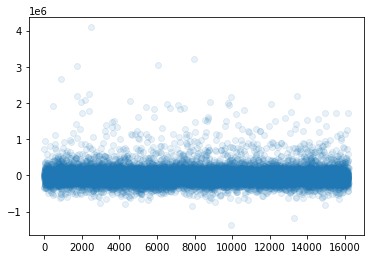

In [15]:
#checking assumptions here? 
y_hat = lr.predict(xtrain_scaled)
resid = (y_train - y_hat)

plt.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.1);

In [16]:
metrics.r2_score(y_train, lr.predict(xtrain_scaled))

0.6275088154718185

In [17]:
model3 = sm.OLS(y_train, xtrain_scaled).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.197
Model:                            OLS   Adj. R-squared (uncentered):              0.196
Method:                 Least Squares   F-statistic:                              305.7
Date:                Tue, 05 Oct 2021   Prob (F-statistic):                        0.00
Time:                        06:11:54   Log-Likelihood:                     -2.3809e+05
No. Observations:               16197   AIC:                                  4.762e+05
Df Residuals:                   16184   BIC:                                  4.763e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -4008.3316   4669.247     -0.858      0.391   -1.32e+04    5143.909
x2         -5.514e+04   5911.306     -9.327      0.000   -6.67e+04   -4.35e+04
x3          4.865e+04   8376.504      5.808      0.000    3.22e+04    6.51e+04
x4          2.081e+05   1.32e+04     15.774      0.000    1.82e+05    2.34e+05
x5          6521.9787   6596.391      0.989      0.323   -6407.676    1.95e+04
x6          1.732e+04   6501.338      2.664      0.008    4573.749    3.01e+04
x7          1.778e+04   1.19e+04      1.500      0.134   -5450.913     4.1e+04
x8         -7.865e+04   6313.643    -12.457      0.000    -9.1e+04   -6.63e+04
x9         -2.946e+04   5871.655     -5.018      0.000    -4.1e+04    -1.8e+04
x10         8.385e+04   4915.193     17.060      0.000    7.42e+04    9.35e+04
x11          -4.7e+04   6146.432     -7.647      0.000    -5.9e+04    -3.5e+04
x12         6.565e+04   7524.954      8.724      0.000    5.09e+04    8.04e+04
x13        -1.396e+04   6675.322     -2.091      0.037    -2.7e+04    -875.214
==============================================================================
Omnibus:                    12324.078   Durbin-Watson:                   0.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           609242.894
Skew:                           3.201   Prob(JB):                         0.00
Kurtosis:                      32.356   Cond. No.                         7.82
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
f = 'price ~ sqft_living+sqft_above'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.050e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        06:12:09   Log-Likelihood:            -3.0005e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.127e+04   4455.441     -9.262      0.000      -5e+04   -3.25e+04
sqft_living   295.7265      4.026     73.448      0.000     287.835     303.618
sqft_above    -18.8097      4.466     -4.212      0.000     -27.563     -10.056
==============================================================================
Omnibus:                    14762.837   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           539868.557
Skew:                           2.809   Prob(JB):                         0.00
Kurtosis:                      26.841   Cond. No.                     7.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
f = 'price ~ sqft_living+bathrooms+bedrooms+zipcode+floors'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     4567.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        06:12:15   Log-Likelihood:            -2.9960e+05
No. Observations:               21597   AIC:                         5.992e+05
Df Residuals:                   21591   BIC:                         5.993e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.803e+07   3.28e+06    -17.703      0.000   -6.45e+07   -5.16e+07
sqft_living   313.1165      3.084    101.533      0.000     307.072     319.161
bathrooms    1.345e+04   3819.917      3.522      0.000    5966.267    2.09e+04
bedrooms    -5.721e+04   2343.608    -24.410      0.000   -6.18e+04   -5.26e+04
zipcode       592.2953     33.413     17.726      0.000     526.803     657.788
floors      -2397.5165   3761.803     -0.637      0.524   -9770.929    4975.896
==============================================================================
Omnibus:                    14472.381   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           499672.173
Skew:                           2.745   Prob(JB):                         0.00
Kurtosis:                      25.916   Cond. No.                     1.85e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Cleaning Data

In [ ]:
salecorr = train.corr()['price'].map(abs).sort_values(ascending=False)
salecorr

In [ ]:
train.info()

In [ ]:
X_train.id.value_counts()
X_train[X_train.id == 795000620]
#Looking into if we should drop ID or not

In [ ]:
X_train = X_train.drop(columns=['lat', 'long','id', 'date'])

In [ ]:
X_train.yr_renovated.isnull().value_counts()
X_train.yr_renovated = X_train.yr_renovated.fillna(0)
X_train.yr_renovated.value_counts()
X_train.view = X_train.view.fillna('NONE')

In [ ]:
X_train['waterfront'] = X_train.waterfront.fillna('N/A')

waterfront_or = X_train.loc[:, ['waterfront']]

encoder_water = OrdinalEncoder()

encoder_water.fit(waterfront_or)

encoder_water.categories_[0]

water_trans = encoder_water.transform(waterfront_or)

water_trans = water_trans.flatten()

X_train['waterfront'] = water_trans

In [ ]:
X_train.waterfront.value_counts()

In [ ]:
X_train.drop(columns='waterfront', inplace=True)

In [ ]:
# Portion of yes is too small to be a good predictor. 

In [ ]:
X_train[X_train.bedrooms == 33]
X_train.bedrooms.value_counts().sort_values(ascending=False)
X_train.drop(index=15856, inplace=True)
# Drop outlire

In [ ]:
X_train.view.value_counts()

In [ ]:
df_1.isnull().sum()

In [ ]:
df_1.info()

In [ ]:
X_train["view"] = X_train["view"].fillna("N/A")
from sklearn.preprocessing import OneHotEncoder 
view = X_train[["view"]]
ohe = OneHotEncoder(categories="auto",sparse=False,handle_unknown="ignore")
ohe.fit(view)
view_trans = ohe.transform(view)
view_trans1= pd.DataFrame(view_trans, columns=ohe.categories_[0],index=X_train.index)
view_trans1
X_train.drop("view", axis=1, inplace=True)
X_train = pd.concat([df_1, view_trans1], axis=1)

In [ ]:
len(X_train.loc[X_train['price']<=1.5*10**6])/len(df_1)

In [ ]:
X_train.price = X_train[X_train.price <= 1500000]

In [ ]:
X_train.price.hist(bins=100)
plt.show


In [ ]:
X_train.info()

In [ ]:
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(

    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"},
    cmap='Greens'
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [ ]:
import seaborn as sns
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), center=0, annot=True, cmap="coolwarm", annot_kws={"size":10})

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.40)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Listing Price");

In [ ]:
sns.lmplot(data=df, x='price', y='sqft_living')
plt.xlabel('Price Millions')
plt.ylabel('Sqft Living')
plt.title('Price vs sqft livng');

In [ ]:
baseline_model = LinearRegression()

In [ ]:
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])
X_train_non_numeric = X_train.select_dtypes(exclude=['int64', 'float64'])
X_train_non_numeric

In [ ]:
X_train["yr_renovated"] = X_train["yr_renovated"].fillna(0)
# X_train["yr_renovated"] = X_train.loc[~(df==0).all(axis=1)]

In [ ]:
X_train.yr_renovated

# Drop data and sqft_basement(not categorical)

In [ ]:
dummies = pd.get_dummies(train[categoricals], prefix=categoricals, drop_first=True)

df_preprocessed = train.drop(categoricals, axis=1)

df_preprocessed = pd.concat([df_preprocessed, dummies], axis=1)

df_preprocessed.head()

In [ ]:
price = np.log(df['price']).mean()
logsqft_living = np.log(df['sqft_living']).mean()
